# import the neccessary module and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

data=pd.read_excel('Data.xlsx')

# data['Tiket Status '].value_counts()


In [2]:
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,1863-02-26,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,NaT,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,NaT,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,NaT,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,NaT,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,NaT,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tickete Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,NaT,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tickete Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,NaT,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tickete Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,NaT,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tickete Not Used,No,NaN,No


# Generate Age

In [3]:
def calculateAge(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

for index, row in data.iterrows():
    age=calculateAge(row['dateOfBirth'])
    if(age<14):
        data.iloc[index,4]="Children"
    elif(age<25):
        data.iloc[index,4]="Youth"
    elif(age<65):
        data.iloc[index,4]="Adult"
    else:
        data.iloc[index,4]="Senior"

In [4]:
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,Adult,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,Adult,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,Youth,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,Adult,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tickete Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,Adult,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tickete Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,Adult,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tickete Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,Adult,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tickete Not Used,No,NaN,No


# Drop irrelevant column and clean data 

In [5]:
cols_to_drop=['miles','Rescheduled_Date','Date_of_Cancelation','title','Ticket First time Use','Rescheduled_Date','Refund Status','dateOfBirth']
df=data.drop(cols_to_drop,axis=1)

In [6]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status
0,M,Ethiopia,Adult,ET268,Economy Class,Tiketed,3/2/2018,4/3/2018,Canceled
1,F,Liberia,Adult,ET268,Economy Class,Tiketed,9/2/2018,4/3/2018,Canceled
2,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,5/2/2018,3/3/2018,Canceled
3,M,France,Adult,ET114,Economy Class,Tiketed,1/2/2018,2/3/2018,Canceled
4,M,Ethiopia,Youth,ET114,Economy Class,Tiketed,6/2/2018,2/3/2018,Canceled
...,...,...,...,...,...,...,...,...,...
1363,F,US,Adult,ET114,Economy Class,Tiketed,22/11/2017,27/12/2017,Tickete Not Used
1364,M,Ethiopia,Adult,ET124,Economy Class,Tiketed,23/11/2017,21/12/2017,Tickete Not Used
1365,F,Ethiopia,Adult,ET266,Economy Class,Tiketed,14/11/2017,13/12/2017,Tickete Not Used
1366,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,6/11/2017,8/12/2017,Tickete Not Used


# Modify Class of service

In [7]:
df.loc[df['cabin_class of service'] == 'Economy Class','cabin_class of service']='Economy'
df.loc[df['cabin_class of service'] == 'Business Class','cabin_class of service']='Business'
df.loc[df['Nationality'] == 'Ethiopia','Nationality']='Local'
df.loc[df['Nationality'] != 'Local','Nationality']='Foreign'


In [8]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Canceled
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Canceled
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Canceled
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Canceled
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Canceled
...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tickete Not Used
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tickete Not Used
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tickete Not Used
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tickete Not Used


# Check for null value

<AxesSubplot:>

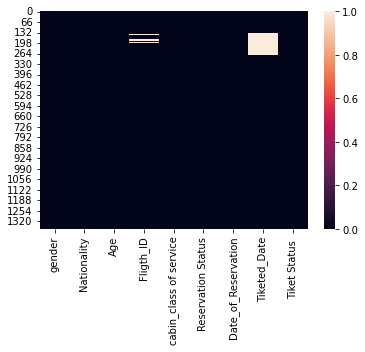

In [9]:
sb.heatmap(df.isnull())

# Filling Missing value

In [10]:
df["gender"].fillna(df['gender'].mode()[0], inplace = True)
df["Nationality"].fillna(df['Nationality'].mode()[0], inplace = True)
df["Age"].fillna(df['Age'].mode()[0], inplace = True)
df["Fligth_ID"].fillna(df['Fligth_ID'].mode()[0], inplace = True)
df["cabin_class of service"].fillna(df['cabin_class of service'].mode()[0], inplace = True)
df["Reservation Status"].fillna(df['Reservation Status'].mode()[0], inplace = True)
df["Date_of_Reservation"].fillna(df['Date_of_Reservation'].mode()[0], inplace = True)
df["Tiketed_Date"].fillna(df['Tiketed_Date'].mode()[0], inplace = True)


In [11]:
df['Fligth_ID'].mode()[0]

'ET114'

<AxesSubplot:>

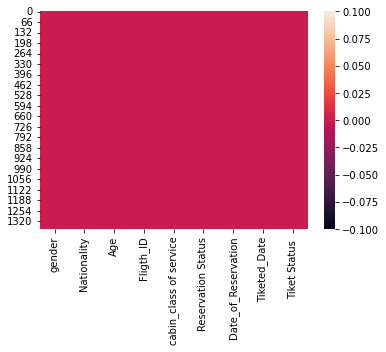

In [12]:
sb.heatmap(df.isnull())

# Data cleaning

In [13]:
df.loc[df['Tiket Status '] == 'Ticketed Used','Tiket Status ']='Tickete Used'
df.loc[df['Tiket Status '] == 'Exchanged','Tiket Status ']='Tickete Used'

df.loc[df['Tiket Status '] == 'Canceled','Tiket Status ']='Tickete Not Used'
df.loc[df['Tiket Status '] == 'Refunded','Tiket Status ']='Tickete Not Used'
df.loc[df['Tiket Status '] == 'Not Ticketed','Tiket Status ']='Tickete Not Used'

df.loc[df['Nationality'] == 'Ethiopia','Nationality']='Local'
df.loc[df['Nationality'] != 'Local','Nationality']='Foreign'
df.groupby('Tiket Status ').count()
# 0 Canceled
# 1 Exchanged
# 2 Not Ticketed
# 3 Refunded
# 4 Ticketed Used
# 5 Tiketed  Not Used

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date
Tiket Status,,,,,,,,
Tickete Not Used,284,284,284,284,284,284,284,284
Tickete Used,1084,1084,1084,1084,1084,1084,1084,1084


# Convert Text categories in to numeric categories

In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical value to number 
le_Age=LabelEncoder()
le_gender=LabelEncoder()
le_nationality=LabelEncoder()
le_flightID=LabelEncoder()
le_cabinClass=LabelEncoder()
le_reservationStatus=LabelEncoder()
le_ticket_status=LabelEncoder()

df['N_Age']=le_Age.fit_transform(df['Age'])
df['N_Gender']=le_nationality.fit_transform(df['gender'])
df['N_Nationality']=le_nationality.fit_transform(df['Nationality'])
df['N_FlightID']=le_nationality.fit_transform(df['Fligth_ID'])
df['N_CabinClass']=le_nationality.fit_transform(df['cabin_class of service'])
df['N_ReservationStatus']=le_nationality.fit_transform(df['Reservation Status'])
df['N_TicketStatus']=le_nationality.fit_transform(df['Tiket Status '])

# convert date or timestamp to number 

le_TiketedDate=LabelEncoder()
le_ReservationDate=LabelEncoder()

df['N_TicketedDate']=le_nationality.fit_transform(df['Tiketed_Date'])
df['N_ReservationDate']=le_nationality.fit_transform(df['Date_of_Reservation'])

before_drop=df;


# Categorize Date into month interval

In [15]:
for index, row in df.iterrows():
    tDate=row['N_TicketedDate']
    RDate=row['N_ReservationDate']
    if(tDate<30):
        df.iloc[index,16]=0
    elif(tDate<60):
        df.iloc[index,16]=1
    elif(tDate<90):
        df.iloc[index,16]=2
    elif(tDate>=90):
        df.iloc[index,16]=3
    
    if(RDate<30):
        df.iloc[index,17]=0
    elif(RDate<60):
        df.iloc[index,17]=1
    elif(RDate<90):
        df.iloc[index,17]=2
    elif(RDate>=90):
        df.iloc[index,17]=3


In [16]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Tickete Not Used,0,1,1,4,1,1,0,2,2
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Tickete Not Used,0,0,0,4,1,1,0,2,3
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Tickete Not Used,0,1,1,3,1,1,0,2,2
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Tickete Not Used,0,1,0,0,1,1,0,1,0
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Tickete Not Used,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tickete Not Used,0,0,0,0,1,1,0,2,1
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tickete Not Used,0,1,1,1,1,1,0,1,1
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tickete Not Used,0,0,1,3,1,1,0,0,0
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tickete Not Used,0,1,1,3,1,1,0,2,2


# Drop categorical value

In [17]:
cols_to_drop=['Age','gender','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiket Status ','Tiketed_Date','Date_of_Reservation']
new_df=df.drop(cols_to_drop,axis=1)


In [18]:
df.groupby('N_TicketStatus').count()

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketedDate,N_ReservationDate
N_TicketStatus,,,,,,,,,,,,,,,,,
0,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284
1,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


# Split the Dataset in to training and test data set

In [19]:
from sklearn.model_selection import train_test_split

input_x=new_df[['N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_ReservationDate']]
target_y=new_df['N_TicketStatus']

x_train,x_test,y_train,y_test=train_test_split(input_x,target_y,test_size=0.3,random_state=0)


In [20]:
x_train

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationDate
592,2,0,0,4,1,2
1011,2,1,0,1,1,2
1244,0,1,1,4,1,0
1030,0,0,1,2,1,2
16,0,0,1,0,1,3
...,...,...,...,...,...,...
763,0,0,1,2,1,1
835,0,0,1,3,1,0
1216,0,0,1,3,1,1
559,0,1,0,3,1,2


In [21]:
x_test

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationDate
1039,0,1,1,3,1,2
1084,0,0,0,4,1,2
597,0,0,0,3,1,1
31,0,1,1,0,0,2
142,0,1,1,2,1,2
...,...,...,...,...,...,...
271,0,0,0,2,1,2
1262,0,1,1,3,0,0
1277,0,1,1,1,0,1
1038,0,1,1,4,1,2


# Build Decission Tree Classifier model 

In [22]:
from sklearn import tree

# Build
model=tree.DecisionTreeClassifier() 




# Train Data 

In [23]:
testY=model.fit(input_x,target_y)
actual=model.score(x_train,y_train)
actual

0.8098223615464994

# Test Data

In [24]:
predict=model.predict(x_test)
model.score(x_test,y_test)


0.8272506082725061

# Accuracy Test

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8272506082725061

# Confusion matrix 

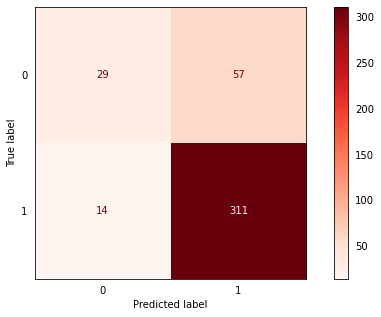

In [26]:
from sklearn.metrics import confusion_matrix

matrix=plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()
# confusion_matrix(y_test, predict)
# confusionchart(confusion_matrix(y_true, y_pred))
# correct=27+2+27+207+6
# incorrect=2+1
# total=274 #the total is y_test length
# accuray=correct/total


In [27]:
import numpy as np
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))
# 0 Canceled
# 1 Exchanged
# 2 Not Ticketed
# 3 Refunded
# 4 Ticketed Used
# 5 Tiketed  Not Used

              precision    recall  f1-score   support

           0       0.67      0.34      0.45        86
           1       0.85      0.96      0.90       325

    accuracy                           0.83       411
   macro avg       0.76      0.65      0.67       411
weighted avg       0.81      0.83      0.80       411



# Random prediction for test

In [28]:
# to do function
# input_x=new_df[['N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_ReservationDate']]

print(model.predict([[0,0,1,0,1,1]]))

[1]


In [29]:
# new_df

In [30]:
df['N_TicketStatus'].value_counts()
# 0 Canceled
# 1 Exchanged
# 2 Not Ticketed
# 3 Refunded
# 4 Ticketed Used
# 5 Tiketed  Not Used

1    1084
0     284
Name: N_TicketStatus, dtype: int64

In [31]:
before_drop['Tiket Status '].value_counts()

Tickete Used        1084
Tickete Not Used     284
Name: Tiket Status , dtype: int64

In [32]:
before_drop

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Tickete Not Used,0,1,1,4,1,1,0,2,2
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Tickete Not Used,0,0,0,4,1,1,0,2,3
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Tickete Not Used,0,1,1,3,1,1,0,2,2
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Tickete Not Used,0,1,0,0,1,1,0,1,0
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Tickete Not Used,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tickete Not Used,0,0,0,0,1,1,0,2,1
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tickete Not Used,0,1,1,1,1,1,0,1,1
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tickete Not Used,0,0,1,3,1,1,0,0,0
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tickete Not Used,0,1,1,3,1,1,0,2,2


# Data report

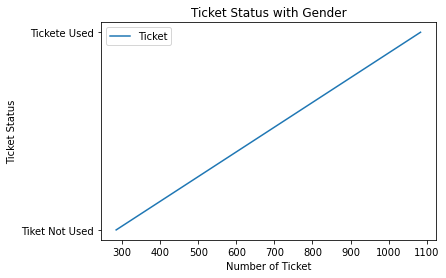

,Ticket Status,Number
0,Tiket Not Used,284
1,Tickete Used,1084


In [33]:
genderTicketAggregated= before_drop.groupby(['Tiket Status '],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','gender','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=genderTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
genderDf = pd.DataFrame(columns=["Index","Ticket Status","Number"]).set_index('Index')
genderDf[genderDf.columns[0]] = ["Tiket Not Used","Tickete Used"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = genderDf.columns[i+1]
    genderDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==0):
        break
genderDf.to_excel("GenderTicketStatusAggregationResult.xlsx",index=False)
genderTicket=pd.read_excel('GenderTicketStatusAggregationResult.xlsx')
genderTicketTranspose=genderTicket.T
genderTicketTranspose=genderTicketTranspose.iloc[1: , :]
sortedgenderTicket=genderTicketTranspose.sort_values([0])
x=[]
y=["Tiket Not Used","Tickete Used"]
for index, row in sortedgenderTicket.iterrows():
    x.append(row[0])
    x.append(row[1])   

plt.plot(x,y)

 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Gender")
plt.legend(["Ticket"])
plt.show()
genderTicket


# Gender with Ticket Status Aggregation

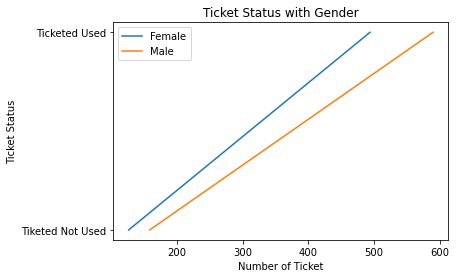

,Gender,Tiketed Not Used,Ticketed Used
0,Female,126,494
1,Male,158,590


In [34]:
genderTicketAggregated= before_drop.groupby(['Tiket Status ','gender'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=genderTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
genderDf = pd.DataFrame(columns=["Index","Gender","Tiketed Not Used","Ticketed Used"]).set_index('Index')
genderDf[genderDf.columns[0]] = ["Female", "Male"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = genderDf.columns[i+1]
    genderDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==1):
        break
genderDf.to_excel("GenderTicketStatusAggregationResult.xlsx",index=False)
genderTicket=pd.read_excel('GenderTicketStatusAggregationResult.xlsx')
genderTicketTranspose=genderTicket.T
genderTicketTranspose=genderTicketTranspose.iloc[1: , :]
sortedgenderTicket=genderTicketTranspose.sort_values([0])
x=[]
y=[]
zStatus=[]

for index, row in sortedgenderTicket.iterrows():
    x.append(row[0])
    y.append(row[1])
    zStatus.append(index)
    
plt.plot(x,zStatus)
plt.plot(y,zStatus)
 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Gender")
plt.legend(["Female","Male"])
plt.show()
genderTicket


In [35]:
# before_drop

# Class of Service with Ticket Status Aggregation

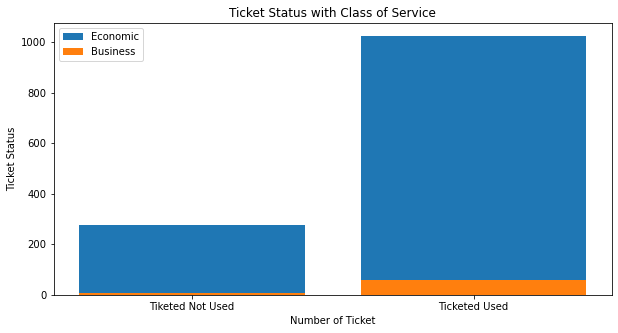

,Class,Tiketed Not Used,Ticketed Used
0,Business,9,60
1,Economic,275,1024


In [36]:
classOfServiceTicketAggregated= before_drop.groupby(['Tiket Status ','cabin_class of service'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=classOfServiceTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
classDf = pd.DataFrame(columns=["Index","Class","Tiketed Not Used","Ticketed Used"]).set_index('Index')
classDf[classDf.columns[0]] = ["Business", "Economic"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = classDf.columns[i+1]
    classDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==1):
        break
classDf.to_excel("ClassOfServiceTicketStatusAggregationResult.xlsx",index=False)
classTicket=pd.read_excel('ClassOfServiceTicketStatusAggregationResult.xlsx')
classTicket
classTicketTranspose=classTicket.T
classTicketTranspose=classTicketTranspose.iloc[1: , :]
sortedclassTicket=classTicketTranspose.sort_values([0])
x=[]
y=[]
zStatus=[]

for index, row in sortedclassTicket.iterrows():
    x.append(row[0])
    y.append(row[1])
    zStatus.append(index)
    
fig = plt.figure(figsize = (10, 5))
plt.bar(zStatus,y)
plt.bar(zStatus,x) 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Class of Service")
plt.legend(["Economic","Business"])
plt.show()
classTicket

# Flight Number with Ticket Status Aggregation

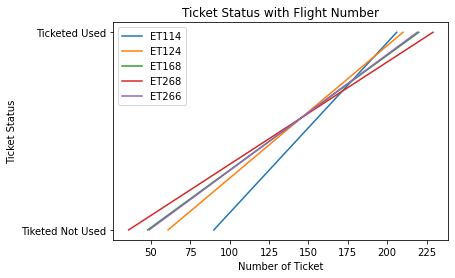

,Flight Number,Tiketed Not Used,Ticketed Used
0,ET114,90,206
1,ET124,61,210
2,ET168,48,220
3,ET266,36,229
4,ET268,49,219


In [37]:
FlightNumberTicketAggregated= before_drop.groupby(['Tiket Status ','Fligth_ID'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=FlightNumberTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
flightDf = pd.DataFrame(columns=["Index","Flight Number","Tiketed Not Used","Ticketed Used"]).set_index('Index')
flightDf[flightDf.columns[0]] = ["ET114", "ET124","ET168", "ET266","ET268"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])   
j=0;
for i in range(len(test)):
    this_column = flightDf.columns[i+1]
    flightDf[this_column] = [test[j], test[j+1],test[j+2], test[j+3],test[j+4]]
    j=j+5
    if(i==1):
        break
flightDf.to_excel("FlightNumberTicketStatusAggregationResult.xlsx",index=False)
flightNumberTicket=pd.read_excel('FlightNumberTicketStatusAggregationResult.xlsx')
flightNumberTicket
flightNumberTicketTranspose=flightNumberTicket.T
flightNumberTicketTranspose=flightNumberTicketTranspose.iloc[1: , :]
sortedflightNumberTicket=flightNumberTicketTranspose.sort_values([0])
a=[]
b=[]
c=[]
d=[]
e=[]
zStatus=[]

for index, row in sortedflightNumberTicket.iterrows():
    a.append(row[0])
    b.append(row[1])
    c.append(row[2])
    d.append(row[3])
    e.append(row[4])
    zStatus.append(index)
    
plt.plot(a,zStatus)
plt.plot(b,zStatus)
plt.plot(c,zStatus)
plt.plot(d,zStatus)
plt.plot(e,zStatus)
 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Flight Number")
plt.legend(["ET114","ET124","ET168","ET268","ET266"])
plt.show()
flightNumberTicket

# Nationality with Ticket Status Aggregation

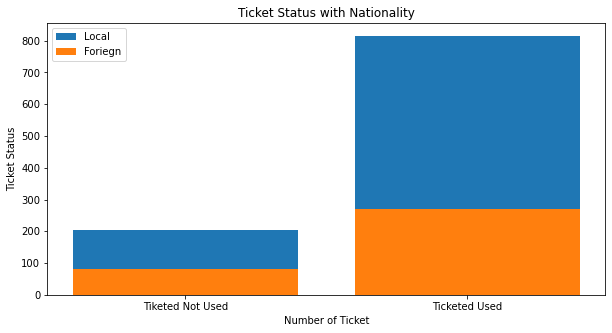

,Nationality,Tiketed Not Used,Ticketed Used
0,Foreign,80,269
1,Local,204,815


In [38]:
NationalityTicketAggregated= before_drop.groupby(['Tiket Status ','Nationality'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','cabin_class of service','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=NationalityTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
nationalityDf = pd.DataFrame(columns=["Index","Nationality","Tiketed Not Used","Ticketed Used"]).set_index('Index')
nationalityDf[nationalityDf.columns[0]] = ["Foreign", "Local"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = nationalityDf.columns[i+1]
    nationalityDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==1):
        break
nationalityDf.to_excel("NationalityTicketStatusAggregationResult.xlsx",index=False)
nationalityTicket=pd.read_excel('NationalityTicketStatusAggregationResult.xlsx')
# nationalityTicket.T.sort_values(by=index,axis=1)
nationalityTranspose=nationalityTicket.T
nationalityTranspose=nationalityTranspose.iloc[1: , :]
sortedNationality=nationalityTranspose.sort_values([0])
xForeign=[]
yLocalcal=[]
zStatus=[]

for index, row in sortedNationality.iterrows():
    xForeign.append(row[0])
    yLocalcal.append(row[1])
    zStatus.append(index)
    
# plt.plot(xForeign,zStatus)
# plt.plot(yLocalcal,zStatus)
 
# plt.xlabel("Number of Ticket")
# plt.ylabel("Ticket Status")
# plt.title("Ticket Status with Nationality")
# plt.legend(["Foriegn","Local"])
# plt.show
fig = plt.figure(figsize = (10, 5))
plt.bar(zStatus,yLocalcal)
plt.bar(zStatus,xForeign) 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Nationality")
plt.legend(["Local","Foriegn"])
plt.show()
nationalityTicket

# Age Status with Ticket Status Aggregation

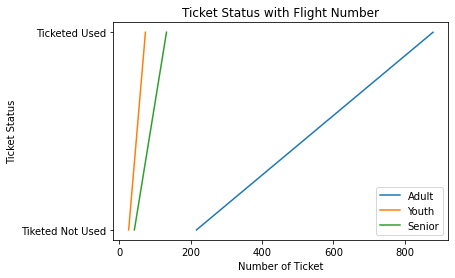

,Age,Tiketed Not Used,Ticketed Used
0,Adult,216,879
1,Youth,26,73
2,Senior,42,132


In [39]:
AgeTicketAggregated= before_drop.groupby(['Tiket Status ','Age'],as_index=True).count()
tobedrop=['Fligth_ID','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=AgeTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
ageDf = pd.DataFrame(columns=["Index","Age","Tiketed Not Used","Ticketed Used"]).set_index('Index')
ageDf[ageDf.columns[0]] = ["Adult", "Youth","Senior"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])   
j=0;
for i in range(len(test)):
    this_column = ageDf.columns[i+1]
    ageDf[this_column] = [test[j], test[j+1],test[j+2]]
    j=j+3
    if(i==1):
        break
ageDf.to_excel("AgeTicketStatusAggregationResult.xlsx",index=False)
AgeTicket=pd.read_excel('AgeTicketStatusAggregationResult.xlsx')
AgeTicket
AgeTicketTranspose=AgeTicket.T
AgeTicketTranspose=AgeTicketTranspose.iloc[1: , :]
sortedAgeTicketTranspose=AgeTicketTranspose.sort_values([0])
a=[]
b=[]
c=[]
zStatus=[]

for index, row in sortedAgeTicketTranspose.iterrows():
    a.append(row[0])
    b.append(row[1])
    c.append(row[2])
    zStatus.append(index)
    
plt.plot(a,zStatus)
plt.plot(b,zStatus)
plt.plot(c,zStatus)
 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Flight Number")
plt.legend(["Adult","Youth","Senior"])
plt.show()
AgeTicket